<a href="https://colab.research.google.com/github/Harshalkotkar21/play_store_app_analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

**The objective of this project is to deliver insights to understand customer 
demands better and thus help developers to popularize the product**

In [ ]:
# Importing libraries
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline






In [ ]:
# importing dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
ps_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/Project 1/Play_Store_Data.csv')


In [ ]:
reviews_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone/Project 1/User_Reviews.csv')

**Analysing the dataset**


In [ ]:
# Checking columns in dataset
ps_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:

# checking size of data
ps_data.shape

(10841, 13)

In [ ]:
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Descriptive Statistics
ps_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


There is clearly a mismatch row in dataset as max rating cannot be 19

In [ ]:
# deleting mismatch data
ps_data.drop(ps_data.index[10472], inplace=True)

**Cleaning the data**

In [ ]:

# Removing unwanted symbols and converting values to numeric
ps_data['Installs']=ps_data['Installs'].map(lambda x:x.rstrip('+'))

In [ ]:

ps_data['Installs']=pd.to_numeric(ps_data['Installs'].str.replace(',',''))

In [ ]:
ps_data['Price']=pd.to_numeric(ps_data['Price'].str.replace('$',''))

In [ ]:
ps_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [ ]:
# Checking for any duplicate values

boolean=ps_data['App'].duplicated().any()
boolean

True

In [ ]:
ps_data.App.value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Candy Crush Saga                                     7
Duolingo: Learn Languages Free                       7
ESPN                                                 7
                                                    ..
Plug-in app (System AC)                              1
Gate Of Death Ep: 1                                  1
EU VAT Checker                                       1
FB Photographie                                      1
Jigsaw Puzzles Volvo FH Trucks                       1
Name: App, Length: 9659, dtype: int64

In [ ]:
# Checking if duplicate data is identical or not
ps_data[ps_data.App == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [ ]:
ps_data.drop_duplicates(inplace=True)

In [ ]:
# Converting review type to numeric

ps_data['Reviews']=pd.to_numeric(ps_data['Reviews'].str.replace('$',''))

In [ ]:
ps_data=ps_data.loc[ps_data.groupby(['App'])['Reviews'].idxmax()]



In [ ]:
# Setting up parameters for plot

sns.set_style('darkgrid')
plt.rcParams['font.size']= 14
plt.rcParams['figure.figsize']= (9,5)
plt.rcParams['figure.facecolor']= '#00000000'

**Detailed Analysis of the Dataset**

In [ ]:
# Getting top 20 apps from Playstre as per their genres
top_genres=ps_data.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [ ]:
genres_installs=ps_data.groupby(['Genres'])[['Installs']].sum()

In [ ]:
top_genre_installs=pd.merge(top_genres,genres_installs,on='Genres')

In [ ]:
top_20_genres_installs=top_genre_installs.head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


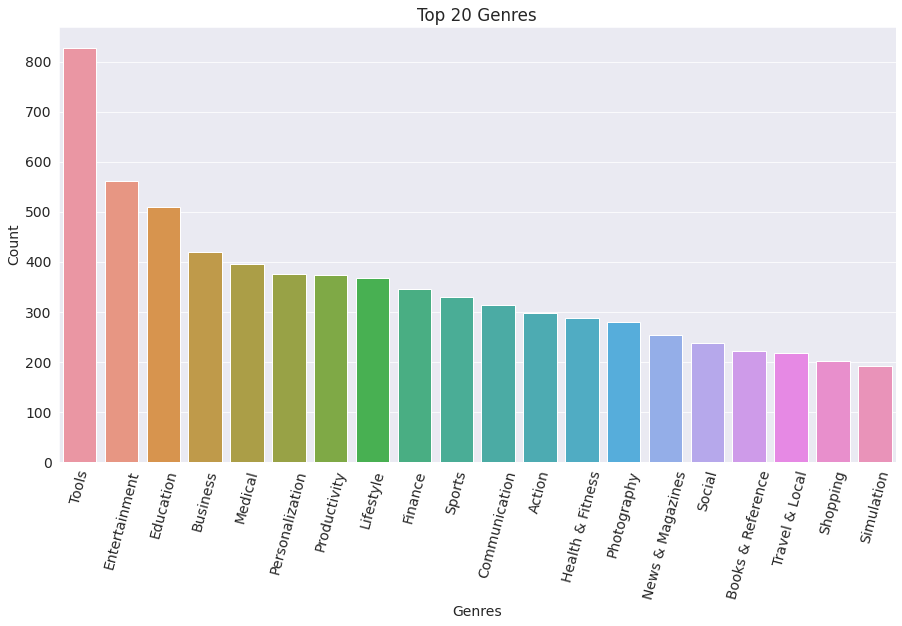

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=75)


plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20 Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


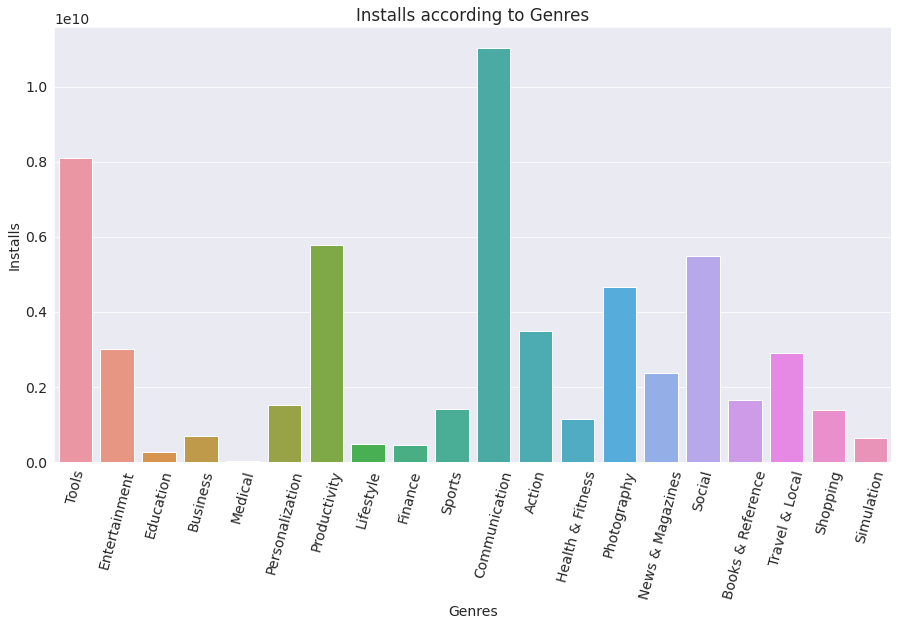

In [ ]:

plt.figure(figsize=(15,8))
plt.xticks(rotation=75)


plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Installs)
plt.show()

In [ ]:
# checking Every category
top_category=ps_data['Category'].value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [ ]:
category_installs=ps_data.groupby(['Category'])[['Installs']].sum()

In [ ]:
top_category_installs=pd.merge(top_category,category_installs,on='Category')
top_20_category_installs=top_category_installs.head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


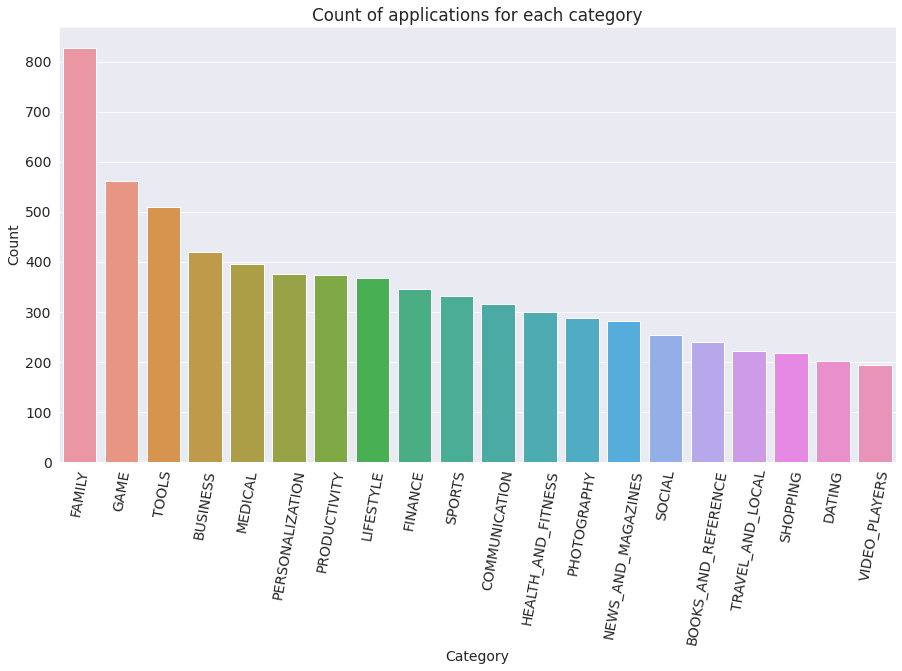

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=80)

plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Count of applications for each category")
sns.barplot(top_20_category_installs.Category, top_20_genres_installs.Count)
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


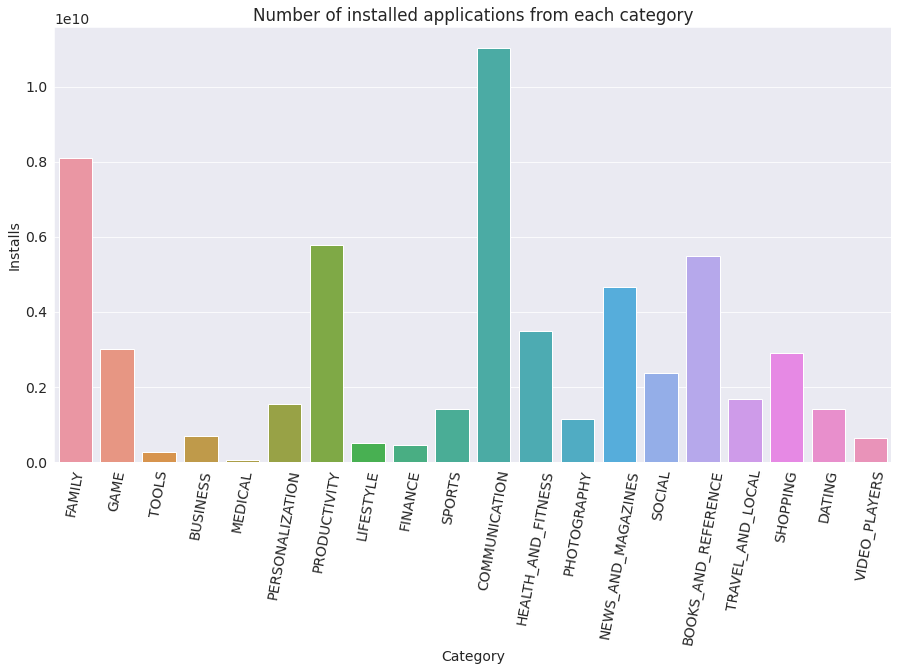

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=80)

plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications from each category")
sns.barplot(top_20_category_installs.Category, top_20_genres_installs.Installs)
plt.show()


**From above two plots we can conclude that Max applications Playstore app  comes under Family,Games And Tools Category But Max Installs from Playstore app are from Games ,Communication and Tools**

**Now getting the Average Ratings Of app**

In [ ]:
genres_ratings=ps_data.groupby(['Genres'])[['Rating']].mean()

In [ ]:
genres_installs_rating=pd.merge(top_genre_installs, genres_ratings,on='Genres')

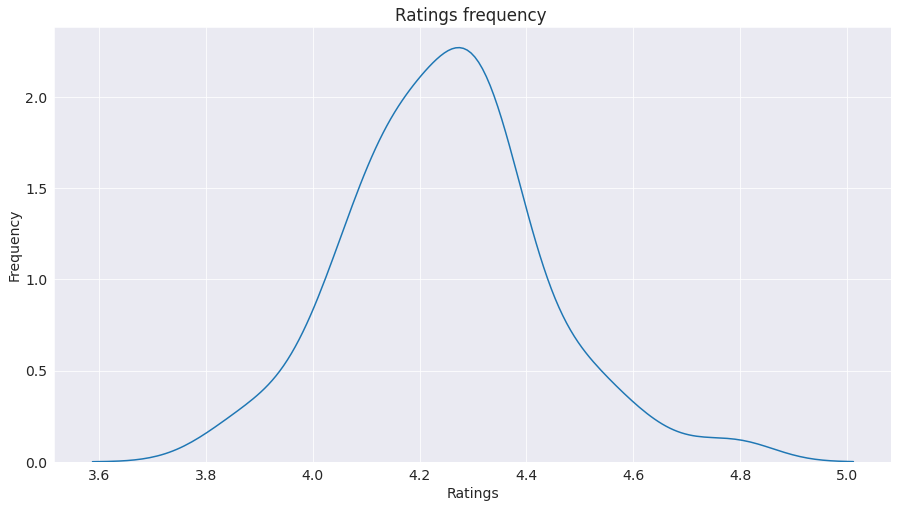

In [ ]:
plt.figure(figsize=(15,8))
 
k=sns.kdeplot(genres_installs_rating.Rating)
k.set_xlabel('Ratings')
k.set_ylabel('Frequency')
plt.title('Ratings frequency ')
plt.show()


In [ ]:
# Ratings according to Genres

genres_installs_rating.sort_values('Rating',ascending=False,inplace=True)

In [ ]:
highest_rated_genres=genres_installs_rating.iloc[0:20]
lowest_rated_genres=genres_installs_rating.iloc[-20:]
lowest_rated_genres=lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


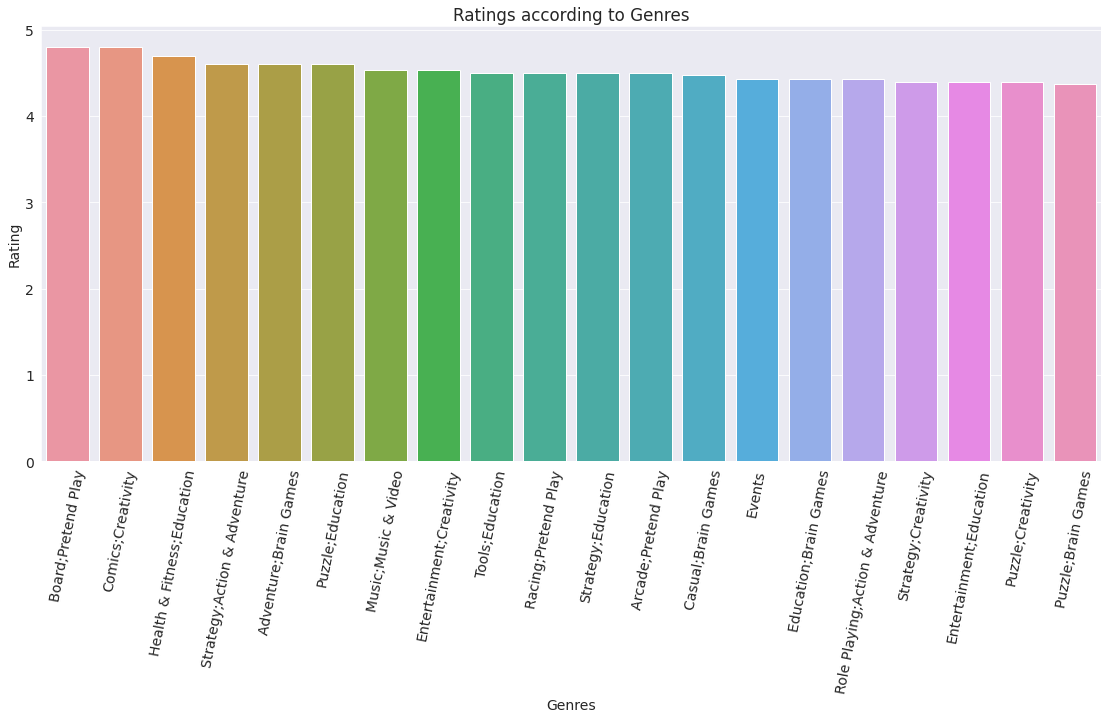

In [ ]:
plt.figure(figsize=(19,8))
plt.xticks(rotation=79)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating)
plt.show()

In [ ]:
# Free and paid apps in each category

app_count=ps_data.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Counts','index':'App'})

In [ ]:
app_count_df=app_count.pivot('Category','Type','Counts').fillna(0).reset_index()

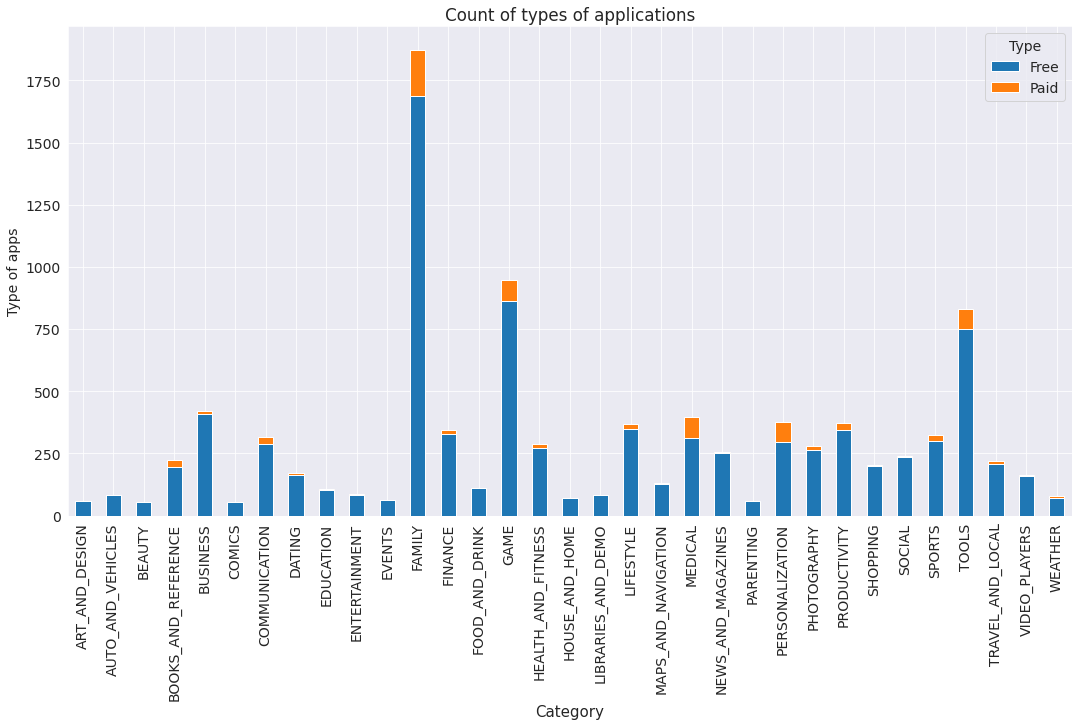

In [ ]:
app_count_df.set_index('Category').plot(kind='bar',stacked=True,figsize=(18,9))
plt.xlabel('Category',fontsize=15)
plt.ylabel('Type of apps')
plt.title('Count of types of applications')
plt.show()


**In our dataset most of the apps are free.Categories like Family,Tools,Medical
and Sports had the biggest number of paid apps**